In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import *

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [3]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [4]:
28 * 28

784

In [5]:
type(df_train.values), df_train.values.shape

(numpy.ndarray, (60000, 785))

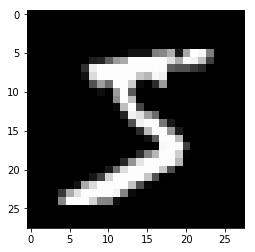

In [6]:
plt.imshow(df_train.values[0, 1:].reshape((28, 28)), cmap="gray")

In [7]:
X_train = df_train.values[:, 1:] / 255 # min_max scaler
y_train = df_train.values[:, 0]

X_test = df_test.values[:, 1:] /255
y_test = df_test.values[:, 0]

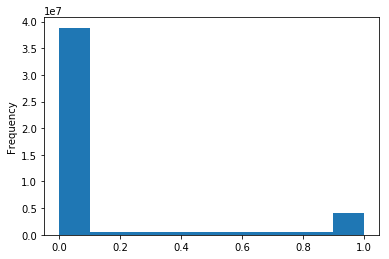

In [8]:
pd.Series(X_train.flatten()).plot.hist()

In [9]:
pd.Series(X_train.flatten()).describe()

count    4.704000e+07
mean     1.306605e-01
std      3.081078e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
dtype: float64

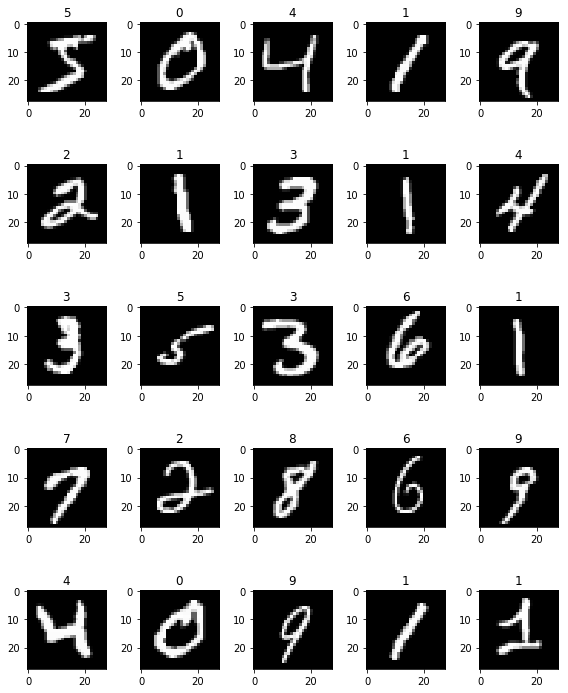

In [10]:
fig, _ = plt.subplots(5, 5, figsize = (8, 10))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28, 28)), cmap = "gray")
    ax.set_title(y_train[i])

plt.tight_layout()

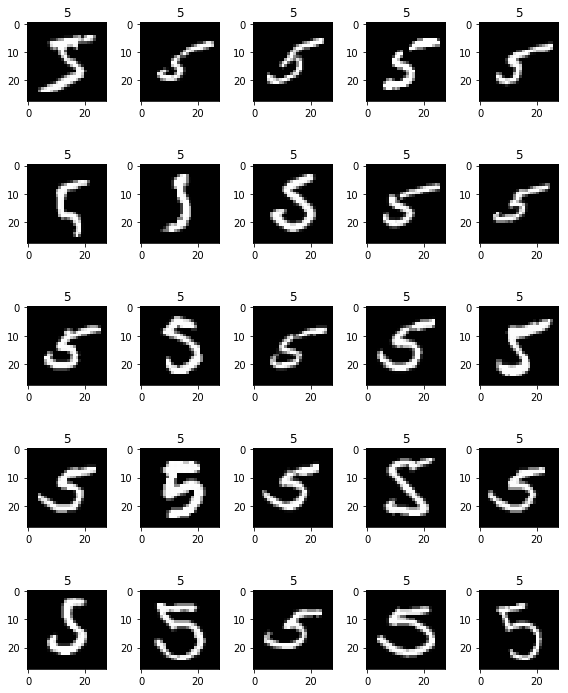

In [11]:
fig, _ = plt.subplots(5, 5, figsize = (8, 10))
digit = 5
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[y_train == digit][i].reshape((28, 28)), cmap = "gray")
    ax.set_title(y_train[y_train == digit][i])

plt.tight_layout()

In [48]:
%%time 

est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15
                                 , loss = "log"  
                                 , learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train, y_train)
print("accuracy", est.score(X_test, y_test), "iterations:", est.n_iter_)

accuracy 0.8992 iterations: 70
CPU times: user 50.3 s, sys: 245 ms, total: 50.6 s
Wall time: 18 s


In [16]:
est.score(X_train, y_train)

0.9023166666666667

In [17]:
y_test_pred = est.predict(X_test)

In [18]:
y_test_pred

array([7, 2, 1, ..., 4, 8, 6])

In [19]:
result = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})
result["error"] =  result.actual != result.prediction

In [21]:
import seaborn as sns

Text(0.5,1,'Mis-classification distribution')

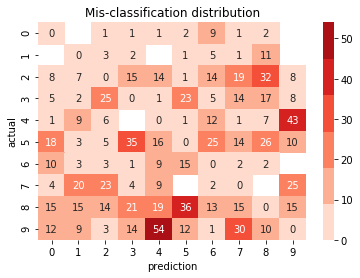

In [28]:
error_dist = result.pivot_table("error", index="actual", columns="prediction", aggfunc="sum")
error_dist = error_dist.sort_index()
sns.heatmap(error_dist, cmap = sns.color_palette("Reds"), annot=True)
plt.title("Mis-classification distribution")

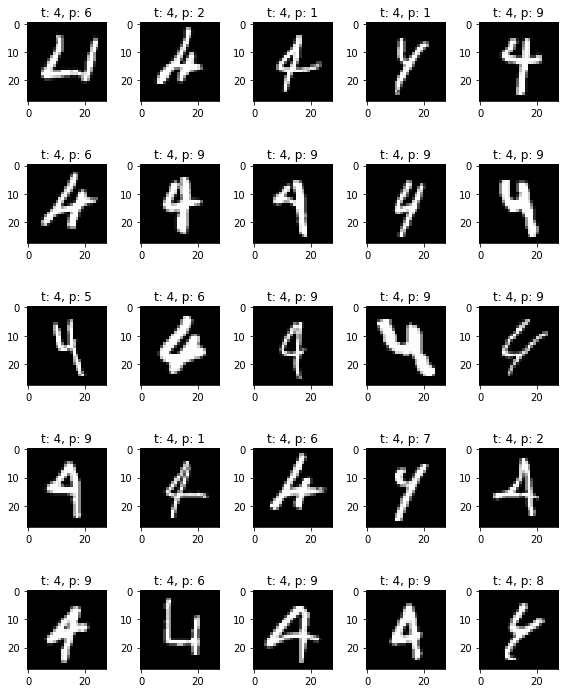

In [33]:
fig, _ = plt.subplots(5, 5, figsize = (8, 10))
digit = 5
for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[result.error & (y_test == 4)][i].reshape((28, 28)), cmap = "gray")
    title = "t: %d, p: %d" \
                % (y_test[result.error & (y_test == 4)][i]
                    , y_test_pred[result.error & (y_test == 4)][i])
    ax.set_title(title)

plt.tight_layout()

In [35]:
est.coef_.shape

(10, 784)

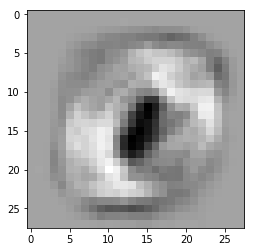

In [43]:
plt.imshow((est.coef_[0]).reshape((28, 28)), cmap="gray")

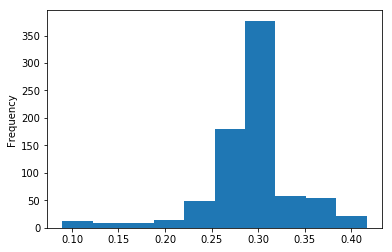

In [42]:
pd.Series(est.coef_[0] + 0.3).plot.hist()

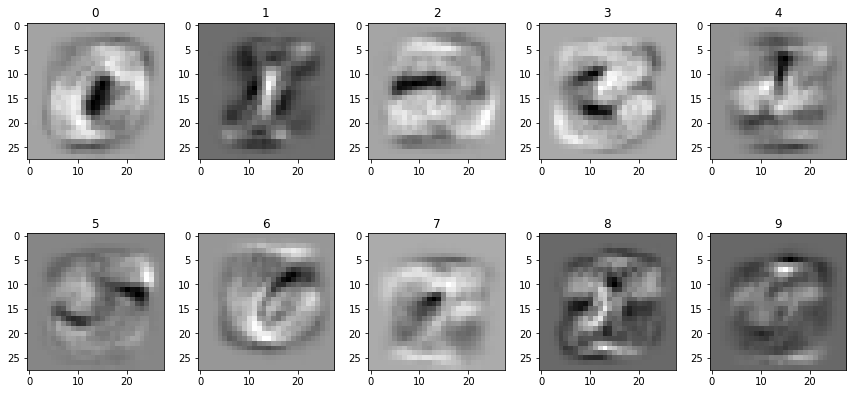

In [46]:
fig, _ = plt.subplots(2, 5, figsize = (12, 6))
for i, ax in enumerate(fig.axes):
    ax.imshow((est.coef_[i]).reshape((28, 28)), cmap="gray")
    ax.set_title(i)
plt.tight_layout()

In [51]:
pd.DataFrame(est.predict_proba(X_test))

,0,1,2,3,4,5,6,7,8,9
0,0.017212,8.337911e-04,0.022233,0.049420,0.004413,0.009895,0.000787,0.870267,0.003056,0.021884
1,0.063162,2.271328e-03,0.545139,0.072700,0.000026,0.115884,0.185677,0.000032,0.014938,0.000171
2,0.003099,7.750539e-01,0.045434,0.026477,0.015782,0.028012,0.033343,0.047879,0.011781,0.013140
3,0.940727,6.753427e-06,0.005438,0.001395,0.000039,0.008501,0.031371,0.008432,0.001876,0.002215
4,0.013239,1.094768e-03,0.052748,0.002246,0.749003,0.007733,0.032138,0.069147,0.011792,0.060860
5,0.001065,8.239173e-01,0.026534,0.032995,0.008353,0.009514,0.005650,0.046801,0.026846,0.018326
6,0.000743,1.826800e-03,0.000640,0.019712,0.665810,0.140276,0.006232,0.036391,0.088393,0.039976
7,0.000435,2.332952e-02,0.010543,0.023227,0.109196,0.127887,0.025387,0.019814,0.019200,0.640980
8,0.060202,9.458886e-03,0.184240,0.000102,0.205234,0.045253,0.453315,0.000865,0.013417,0.027912
9,0.003314,3.526737e-04,0.000214,0.000568,0.082983,0.004008,0.002944,0.176919,0.036615,0.692082


In [52]:
y_test_pred

array([7, 2, 1, ..., 4, 8, 6])

In [66]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [54]:
pca = decomposition.PCA()
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

([], <a list of 0 Text xticklabel objects>)

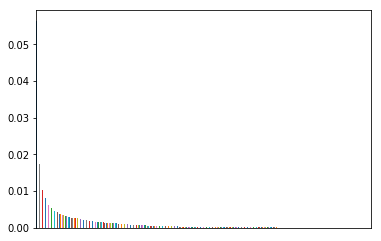

In [57]:
pd.Series(pca.explained_variance_ratio_).plot.bar()
plt.xticks([])

In [61]:
explained_variance = pd.Series(pca.explained_variance_ratio_).cumsum()
explained_variance[explained_variance>0.99].head()

542    0.990088
543    0.990183
544    0.990276
545    0.990369
546    0.990462
dtype: float64

In [62]:
pca = decomposition.PCA(n_components=542)
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=542, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [68]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [69]:
X_train_pca.shape, X_test_pca.shape

((60000, 542), (10000, 542))

In [70]:
%%time 
est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15
                                 , loss = "log"  
                                 , learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train_pca, y_train)
print("accuracy", est.score(X_test_pca, y_test), "iterations:", est.n_iter_)

accuracy 0.9107 iterations: 54
CPU times: user 35.3 s, sys: 86.7 ms, total: 35.4 s
Wall time: 10.1 s


In [72]:
%%time 

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("pca", decomposition.PCA(n_components=100)),
    ("est", linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15
                                 , loss = "log"  
                                 , learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100))
])

pipe.fit(X_train, y_train)
print("test accuracy", pipe.score(X_test, y_test))

test accuracy 0.9029
CPU times: user 20.2 s, sys: 1.69 s, total: 21.9 s
Wall time: 8.85 s


In [73]:
pca.inverse_transform(X_train_pca[0]).shape

(784,)

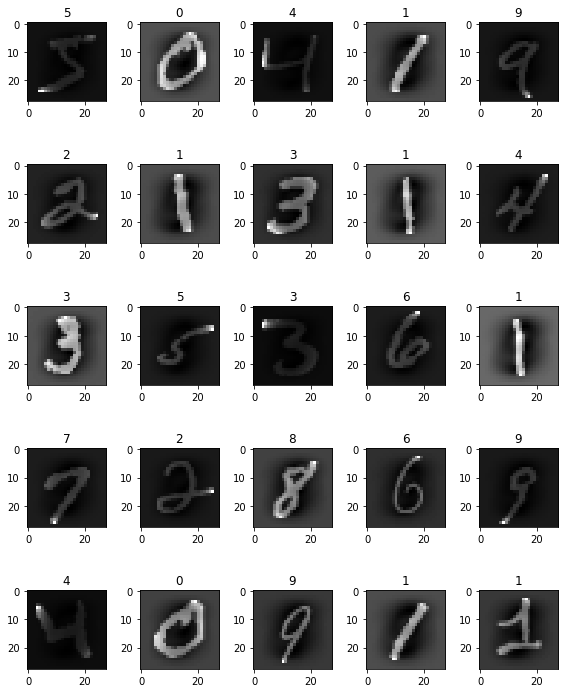

In [77]:
fig, _ = plt.subplots(5, 5, figsize = (8, 10))

pca = decomposition.PCA(n_components=784)
X_train_pca = pca.fit_transform(X_train_std)

for i, ax in enumerate(fig.axes):
    ax.imshow(pca.inverse_transform(X_train_pca[i]).reshape((28, 28)), cmap = "gray")
    ax.set_title(y_train[i])

plt.tight_layout()

In [78]:
est.intercept_.shape

(10,)